In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('C:\\Users\\sreek\\Downloads\\SampleSuperstore.csv')
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [7]:
df.drop('Country', axis =1, inplace = True)

In [8]:
df.drop('Postal Code', axis = 1, inplace = True)

In [9]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Abilene            1
Conway             1
Normal             1
Cedar Rapids       1
Kissimmee          1
Name: City, Length: 531, dtype: int64

In [12]:
df['City'].nunique()

531

In [13]:
df['State'].nunique()

49

(array([0, 1, 2]),
 [Text(0, 0, 'Office Supplies'),
  Text(1, 0, 'Furniture'),
  Text(2, 0, 'Technology')])

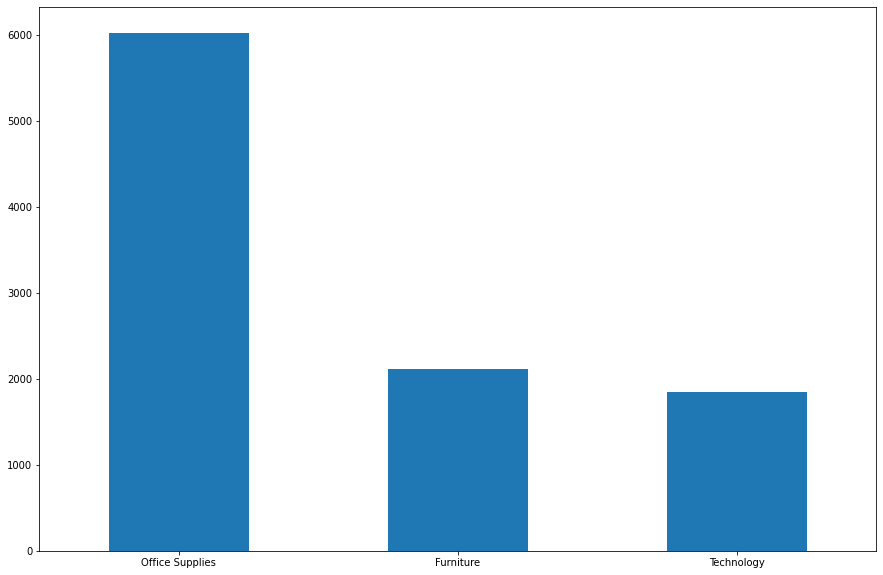

In [15]:
plt.figure(figsize = (15,10))
df['Category'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)

<AxesSubplot:ylabel='Sub-Category'>

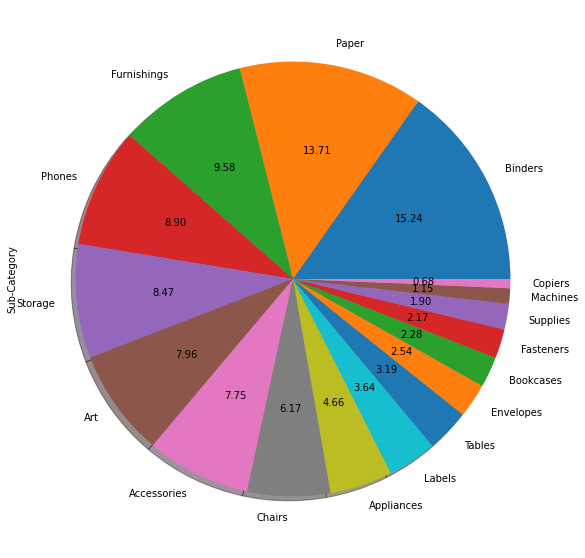

In [16]:
fig = plt.figure(figsize= (15,10))
df['Sub-Category'].value_counts().plot.pie(autopct = '%.2f',shadow = True)

<AxesSubplot:xlabel='Region'>

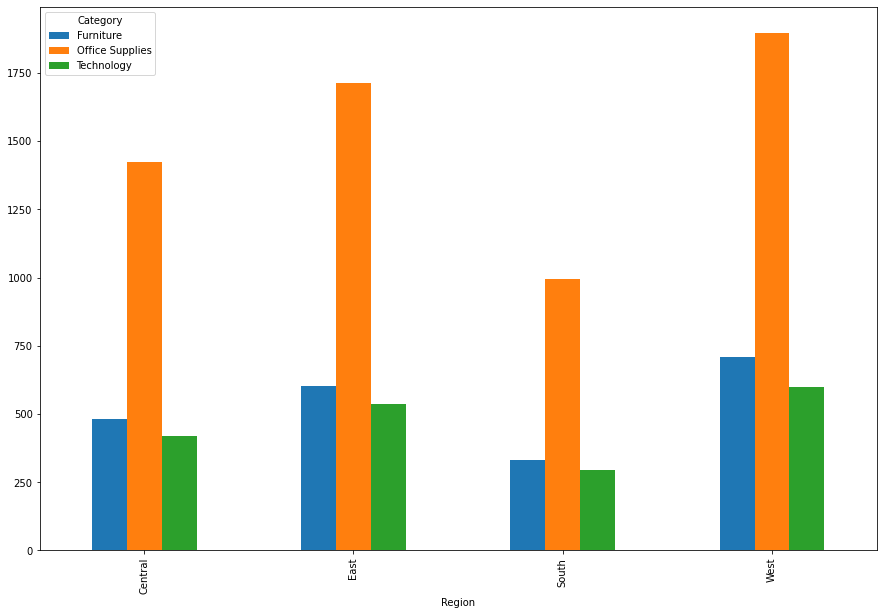

In [18]:
pd.crosstab(df['Region'],df['Category']).plot(kind = 'bar',figsize=(15,10))

In [19]:
df['%_profit'] = df['Profit'] / df['Sales'] * 100
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [20]:
print("MAXIMUM PROFIT")
max(df['%_profit'])

MAXIMUM PROFIT


50.0

In [21]:
print("MAXIMIM LOSS")
min(df['%_profit'])

MAXIMIM LOSS


-275.0

In [22]:
loss = df[df['%_profit'] < 0]
loss.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.000000
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-180.000000
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-150.000000
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-1.428571
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-54.000000


In [23]:
print("Total size of Loss data ")
loss.shape

Total size of Loss data 


(1871, 12)

In [24]:
print("total size of data")
df.shape

total size of data


(9994, 12)

In [25]:
1871/9994 * 100

18.721232739643785

In [26]:
profit_city = df.groupby("City").sum()['Profit']
profit_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

In [27]:
profit_city.sort_values(ascending = False).head()

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

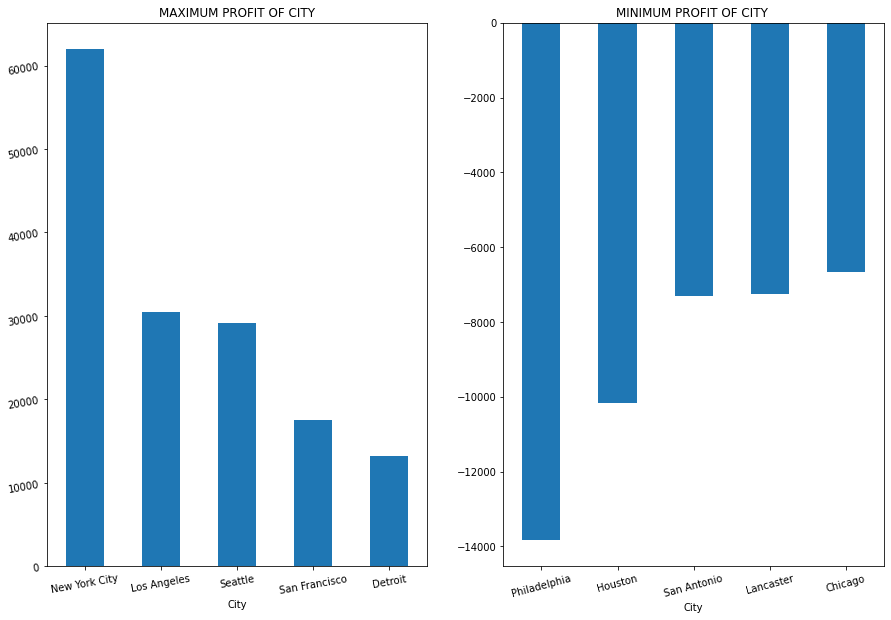

In [28]:
fig,axes = plt.subplots(1,2, figsize = (15,10))
profit_city.sort_values(ascending = False).head().plot(kind ='bar', ax = axes[0])
axes[0].tick_params(labelrotation = 10)
axes[0].set_title("MAXIMUM PROFIT OF CITY")
profit_city.sort_values(ascending = True).head().plot(kind='bar',ax = axes[1])
plt.xticks(rotation = 15)
plt.title("MINIMUM PROFIT OF CITY ")
plt.show()

In [29]:
state_profit = df.groupby('State').sum()['Profit']

Text(0.5, 1.0, 'STATE WISE PROFIT')

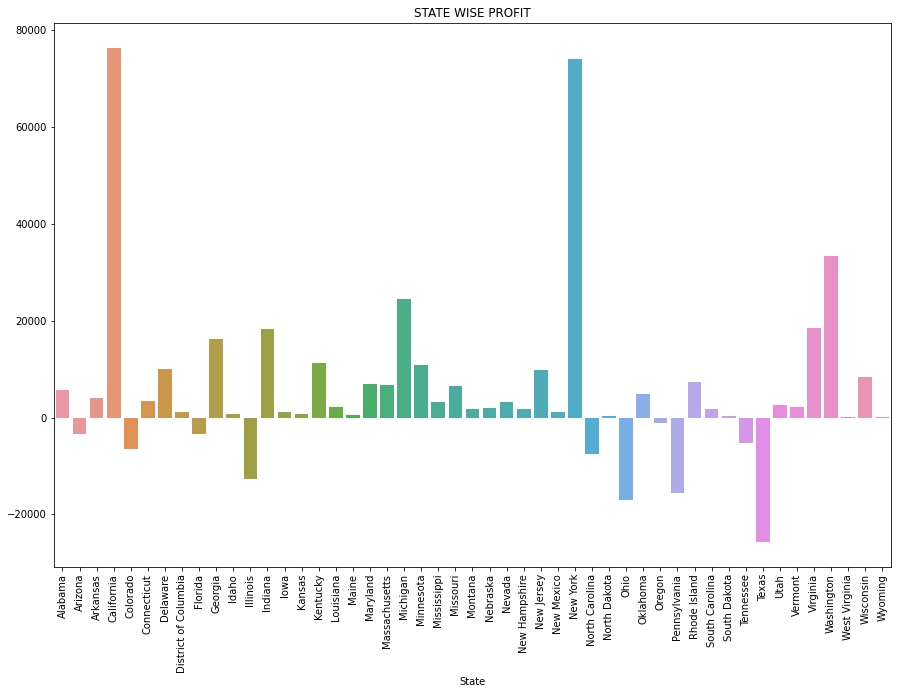

In [30]:
plt.figure(figsize =(15,10))
sns.barplot(x = state_profit.index, y=state_profit.values)
plt.xticks(rotation =90)
plt.title("STATE WISE PROFIT")

In [31]:
state_profit.sort_values(ascending = False).head(5)

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

In [32]:
df_state_profit = pd.DataFrame(state_profit)
type(df_state_profit)

pandas.core.frame.DataFrame

In [41]:
region_profit = pd.DataFrame(df.groupby('Region').sum()['Profit'])

<AxesSubplot:ylabel='Profit'>

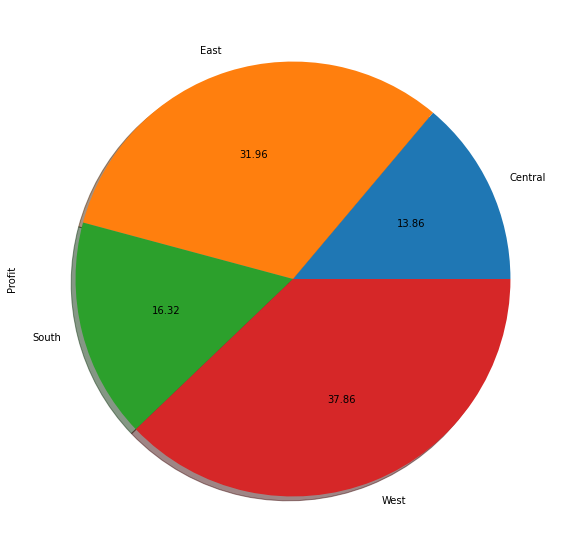

In [50]:
fig = plt.figure(figsize= (15,10))
df.groupby('Region').sum()['Profit'].plot.pie(autopct = '%.2f',shadow = True)

In [51]:
city_sale = pd.DataFrame(df.groupby('City').sum()['Sales'])
city_sale_sort = city_sale.sort_values(by= 'Sales',ascending = False).head(10)


In [42]:
df.groupby('Region').sum()['Profit']

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [43]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [58]:
region_sale = pd.DataFrame(df.groupby('Region').sum()['Sales'])
region_sale_sort =region_sale.sort_values(by= 'Sales',ascending = False).head(10)

<AxesSubplot:ylabel='Sales'>

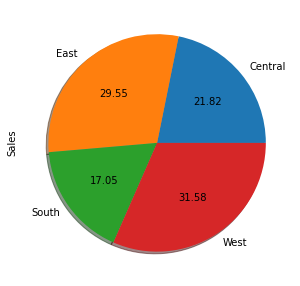

In [59]:
fig = plt.figure(figsize= (5,5))
df.groupby('Region').sum()['Sales'].plot.pie(autopct = '%.2f',shadow = True)